In [164]:
# Select the PANGEO kernel to be able to use this Notebook
import xarray as xr
import pandas as pd
import numpy as np
from netCDF4 import Dataset
import matplotlib.pylab as plt
import matplotlib as mpl
from matplotlib import rcParams
from mpl_toolkits.basemap import Basemap
import hvplot.xarray

%matplotlib inline

>> ## Read model exps. data

In [165]:
DATAP="/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG025.L75/CREG025.L75-NEMO420IVO-S/1d/1980/"
filein="CREG025.L75-NEMO420IVO_y1980m08.1d_IceCurlBudg_SP.nc"
#filein="CREG025.L75-NEMO420IVO_y1980m03.1d_IceCurlBudg_SP.nc"
ds=xr.open_mfdataset(DATAP+filein) #,decode_times=False)

In [166]:
DATAP="/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG025.L75/CREG025.L75-NEMO420IVO-S/1d/1980/"
filein="CREG025.L75-NEMO420IVO_y1980m08.1d_icemod.nc"
#filein="CREG025.L75-NEMO420IVO_y1980m03.1d_icemod.nc"
icemod=xr.open_mfdataset(DATAP+filein) #,decode_times=False)

In [167]:
#iloc=210 
#jloc=420
#iloc=250 
#jloc=500
iloc=180 
jloc=500

alpha=1.

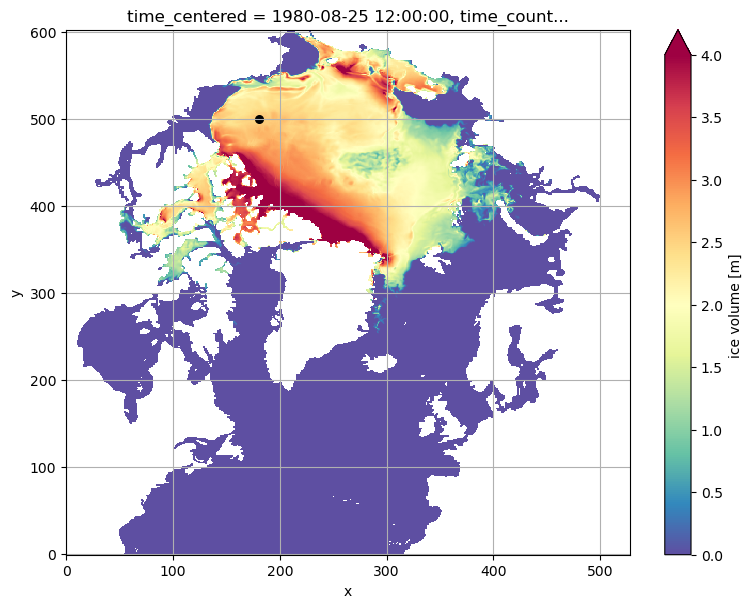

In [168]:
plt.figure(figsize=(20,15))
plt.subplot(221)
icemod['sivolu'].sel(time_counter='1980-08-25').plot(vmin=0.,vmax=4,cmap='Spectral_r')
plt.scatter(iloc,jloc,c='black',marker='o',s=30)
plt.grid(True)


In [169]:
icemod['mdXicedt']=xr.where(np.isnan(icemod['mdXicedt']), 0., icemod['mdXicedt'] )
icemod['snwmass']=xr.where(np.isnan(icemod['snwmass']), 0., icemod['snwmass'] )
icemod['icemass']=xr.where(np.isnan(icemod['icemass']), 0., icemod['icemass'] )

In [170]:
ds['TbiCurl']=xr.where(np.isnan(ds['TbiCurl']), 0., ds['TbiCurl'] )
ds['CorCurl']=xr.where(np.isnan(ds['CorCurl']), 0., ds['CorCurl'] )
ds['SigrCurl']=xr.where(np.isnan(ds['SigrCurl']), 0., ds['SigrCurl'] )
ds['TaiCurl']=xr.where(np.isnan(ds['TaiCurl']), 0., ds['TaiCurl'] )
ds['ToiCurl']=xr.where(np.isnan(ds['ToiCurl']), 0., ds['ToiCurl'] )

In [171]:
sum_RHS=(ds['CorCurl'].isel(y=jloc,x=iloc)+\
        ds['SigrCurl'].isel(y=jloc,x=iloc)+\
        ds['TaiCurl'].isel(y=jloc,x=iloc)+\
        ds['ToiCurl'].isel(y=jloc,x=iloc)+\
        ds['TbiCurl'].isel(y=jloc,x=iloc))

In [172]:
# Normalize the wind curl to plot 
Wnd_curl_TS=ds['WndCurl']

# Compute the mean and standard deviation
Wnd_curl_TS_mean = Wnd_curl_TS.mean(dim='time_counter')
Wnd_curl_TS_std_dev = Wnd_curl_TS.std(dim='time_counter')

# Normalize the time series
normalized_Wnd_curl_TS = (Wnd_curl_TS - Wnd_curl_TS_mean) / Wnd_curl_TS_std_dev

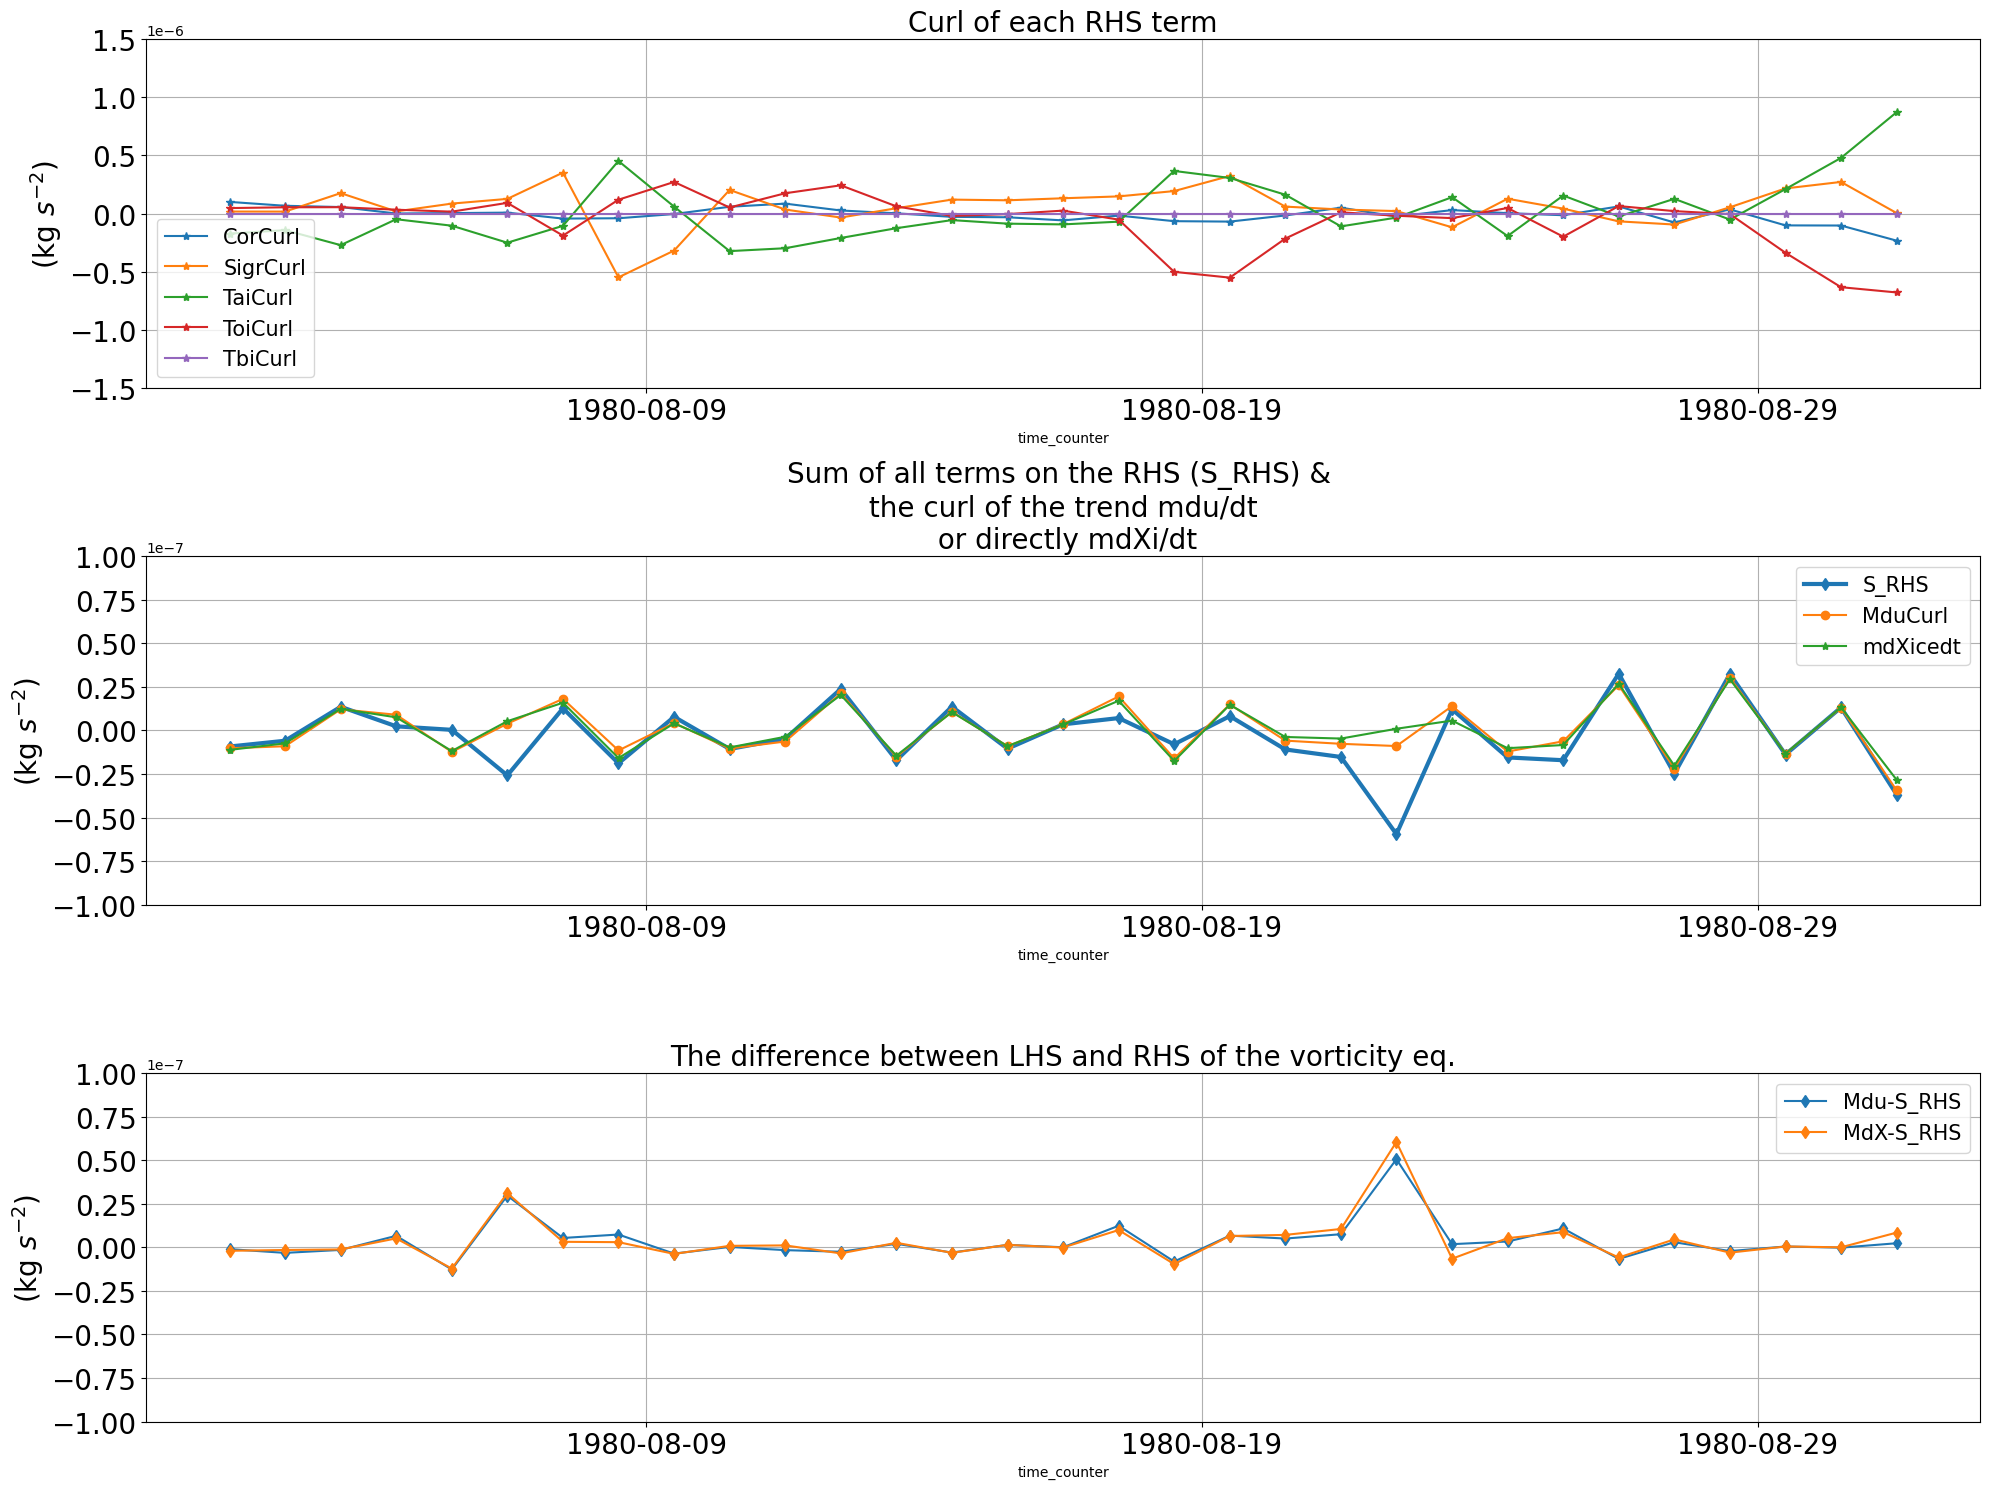

In [173]:
plt.figure(figsize=(20,15))

Time_lim=[cftime.DatetimeNoLeap(1980, 3, 17),cftime.DatetimeNoLeap(1980, 3, 22)]

plt.subplot(311)
(ds['CorCurl'].isel(y=jloc,x=iloc)*alpha).plot(label='CorCurl',marker='*')
(ds['SigrCurl'].isel(y=jloc,x=iloc)*alpha).plot(label='SigrCurl',marker='*')
(ds['TaiCurl'].isel(y=jloc,x=iloc)*alpha).plot(label='TaiCurl',marker='*')
(ds['ToiCurl'].isel(y=jloc,x=iloc)*alpha).plot(label='ToiCurl',marker='*')
(ds['TbiCurl'].isel(y=jloc,x=iloc)*alpha).plot(label='TbiCurl',marker='*')
plt.ylabel('(kg $s^{-2}$)',size=20)
#plt.ylim([-0.75e-6,0.75e-6])
plt.ylim([-1.5e-6,1.5e-6])
plt.yticks(size=20)
plt.xticks(size=20)
#plt.xlim(Time_lim)

plt.legend(fontsize=15)
plt.grid(True)
plt.title('Curl of each RHS term',size=20)
plt.ylabel('(kg $s^{-2}$)')

plt.subplot(312)
sum_RHS.plot(label='S_RHS',linewidth=3,marker='d')
(ds['MduCurl'].isel(y=jloc,x=iloc)).plot(label='MduCurl',marker='o')
(icemod['mdXicedt'].isel(y=jloc,x=iloc)).plot(label='mdXicedt',marker='*')
plt.title('Sum of all terms on the RHS (S_RHS) & \n the curl of the trend mdu/dt \n or directly mdXi/dt',size=20)
plt.ylabel('(kg $s^{-2}$)',size=20)
plt.ylim([-1.e-7,1.e-7])
plt.yticks(size=20)
plt.xticks(size=20)
plt.legend(fontsize=15)
plt.grid(True)
#plt.xlim(Time_lim)


if False :
    ax = plt.gca().twinx()
    (normalized_Wnd_curl_TS.isel(y=jloc,x=iloc)).plot(label='WndCurl',color='purple',marker='*', ax=ax)
    ax.set_ylabel('Wind Curl', color='purple',size=15)
    # Set the color of the y-axis to match the curve
    ax.yaxis.label.set_color('purple')
    ax.yaxis.set_tick_params(colors='purple',size=20)
    ax.set_ylim([-3.,3.])
    plt.legend(fontsize=15,loc='upper left')


plt.subplot(313)
(ds['MduCurl'].isel(y=jloc,x=iloc)-sum_RHS).plot(label='Mdu-S_RHS',marker='d')
(icemod['mdXicedt'].isel(y=jloc,x=iloc).values-sum_RHS).plot(label='MdX-S_RHS',marker='d')
plt.title('The difference between LHS and RHS of the vorticity eq.',size=20)
plt.ylabel('(kg $s^{-2}$)',size=20)
plt.yticks(size=20)
plt.xticks(size=20)
plt.ylim([-1.e-7,1.e-7])
plt.legend(fontsize=15)
plt.ylabel('(kg $s^{-2}$)',size=20)
#plt.xlim(Time_lim)
plt.grid(True)

plt.tight_layout()
